# Illustrate Pulling Run Data From ADAM

In [1]:
from adam import Batch
from adam import Batches
from adam import BatchRunManager
from adam import PropagationParams
from adam import OpmParams
from adam import ConfigManager
from adam import Projects
from adam import RestRequests
from adam import AuthenticatingRestProxy
from adam import AdamProcessingService
from adam import ApsRestServiceResultsProcessor
from adam import BatchPropagationResults
import matplotlib.pyplot as plt
import time
import os

This sets up authenticated access to the server. It needs to be done before pretty much everything you want to do with ADAM.

In [4]:
# ConfigManager loads the config set up via adamctl.
# See the README at https://github.com/B612-Asteroid-Institute/adam_home/blob/master/README.md
config_manager = ConfigManager()
config_manager.set_default_env('dev')
config = config_manager.get_config()
auth_rest = AuthenticatingRestProxy(RestRequests())
aps = AdamProcessingService(auth_rest)

## Getting Jobs List

It is possible to query the service for all the jobs for your project.

In [5]:
jobs = aps.get_jobs(config['workspace'])
completed_jobs = [j for j in jobs['items'] if j['status'] == 'COMPLETED']
print(f"Completed Jobs:{len(completed_jobs)}")

Completed Jobs:17


## Get Job Results

### Get first job (assuming at leastone job) and its inputs JSON

In [6]:
job = completed_jobs[0]
print(job['inputParametersJson'])

{"opm": {"header": {"comments": [], "originator": "ADAM Web UI", "creation_date": "2020-07-07T21:22:06.350Z"}, "metadata": {"comments": [], "object_id": "1594156926349", "ref_frame": "ICRF", "center_name": "SUN", "object_name": "1594156926349", "time_system": "TT", "ref_frame_epoch": null}, "keplerian": {"gm": 132712440041.9394, "comments": [], "inclination": 23.191608, "mean_motion": 0, "eccentricity": 0.279241, "mean_anomaly": 0, "true_anomaly": 230.970479, "ra_of_asc_node": 5.39833, "semi_major_axis": 196121611.7047344, "arg_of_pericenter": 59.341179}, "maneuvers": [], "covariance": null, "spacecraft": null, "adam_fields": [], "state_vector": {"x": 0, "y": 0, "z": 0, "epoch": "2008-12-30T01:14:17.620Z", "x_dot": 0, "y_dot": 0, "z_dot": 0, "comments": []}, "ccsds_opm_vers": "2.0"}, "end_time": "2011-12-30T01:14:17.635Z", "executor": "stk", "start_time": "2008-12-30T01:14:17.620Z", "stopOnImpact": false, "cartesianSigma": null, "keplerianSigma": {"gm": 0, "comments": [], "inclination"

### Get Job Result Data

In [6]:
batch_run = aps.get_job_results(config['workspace'], job['uuid'])

### Confirm Job Completed

In [7]:
batch_run.check_status()

'COMPLETED'

### Get Number of Runs

In [8]:
runs_count = batch_run.get_result_ephemeris_count()
print(f'# Runs: {runs_count}')

# Runs: 11


### Get Summary Statistics

In [9]:
stats = batch_run.get_summary()
print(stats)

{'misses': 11, 'close_approach': 0, 'impacts': 0, 'pc': 0.0}


### Get Ephemeris and Graph

[Timestamp('2017-10-04 00:00:00') 130347560.1335 -82288041.15372841
 -2741520.150300201 23.93524884363 29.02186659761898 -1.3053774191565335]


<AxesSubplot:xlabel='Epoch', ylabel='Velocity(km/s)'>

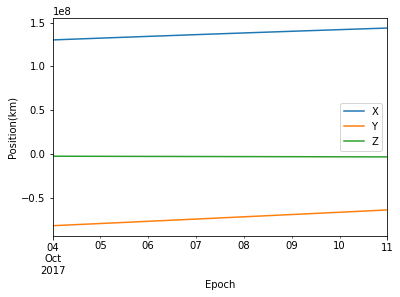

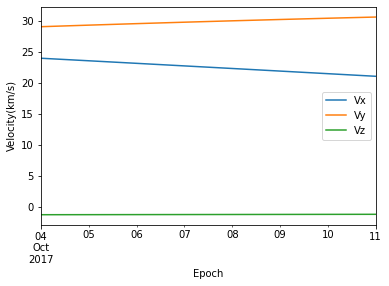

In [10]:
eph = batch_run.get_result_ephemeris(2)
print (eph.values[0])
eph.plot(x='Epoch', y=['X','Y','Z'], ylabel='Position(km)')
eph.plot(x='Epoch', y=['Vx','Vy','Vz'], ylabel="Velocity(km/s)")

In [11]:
### Get Raw Ephemeris Data

In [12]:
ephem_raw_data = batch_run.get_result_raw_ephemeris(2)
print(ephem_raw_data)

stk.v.11.0
BEGIN Ephemeris
ScenarioEpoch 04 Oct 2017 00:00:00.000000
CentralBody SUN
CoordinateSystem ICRF
InterpolationMethod HERMITE
InterpolationOrder 5
NumberOfEphemerisPoints 8

EphemerisTimePosVel
0.000000000000e+00 1.303475601335e+11 -7.440728759304e+10 -3.524759853804e+10 2.393524884363e+04 2.714629132829e+04 1.034657518873e+04
8.640000000000e+04 1.323979017940e+11 -7.205192283917e+10 -3.434894303687e+10 2.352586222700e+04 2.737450360283e+04 1.045501952587e+04
1.728000000000e+05 1.344127479740e+11 -6.967723942427e+10 -3.344107796102e+10 2.311365770293e+04 2.759347848765e+04 1.055975587902e+04
2.592000000000e+05 1.363918716097e+11 -6.728403626072e+10 -3.252432458741e+10 2.269901429550e+04 2.780320032640e+04 1.066076447235e+04
3.456000000000e+05 1.383350781923e+11 -6.487311286780e+10 -3.159900558744e+10 2.228230639228e+04 2.800367063803e+04 1.075803277155e+04
4.320000000000e+05 1.402422053215e+11 -6.244526791166e+10 -3.066544440957e+10 2.186390268296e+04 2.819490755279e+04 1.0851

### Get ending state vector

In [13]:
end_state_vectors = batch_run.get_final_positions(BatchPropagationResults.PositionOrbitType.CLOSE_APPROACH)
print("Close State Vectors")
if len(end_state_vectors) > 0:
    print(f'First close end state: {end_state_vectors[0]}')
else:
    print("None")


end_state_vectors = batch_run.get_final_positions(BatchPropagationResults.PositionOrbitType.IMPACT)
print("Impact State Vectors")
if len(end_state_vectors) > 0:
    print(f'First impact end state: {end_state_vectors[0]}')
else:
    print("None")


end_state_vectors = batch_run.get_final_positions(BatchPropagationResults.PositionOrbitType.MISS)
print("Miss State Vectors")
if len(end_state_vectors) > 0:
    print(f'First miss end state: {end_state_vectors[0]}')
else:
    print("None")



Close State Vectors
None
Impact State Vectors
None
Miss State Vectors
First miss end state: [1610537328.1226196, -99035107564.6815, -46761965680.43153]
